### Шаг 1

In [58]:
import pandas as pd
import numpy as np
import os
import requests
from dotenv import load_dotenv, find_dotenv, dotenv_values
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from matplotlib.ticker import MultipleLocator
import matplotlib.colors as colors
import seaborn as sns

### Шаг 2

In [2]:
%load_ext dotenv
%dotenv

In [3]:
load_dotenv(find_dotenv())  
DATE_BEGIN = os.getenv('DATE_BEGIN')
DATE_END = os.getenv('DATE_END')
API_URL = os.getenv('API_URL')
# API_URL = "https://data-charts-api.hexlet.app"
# DATE_BEGIN = '2023-03-01'
# DATE_END = '2023-09-01'

In [4]:
print(API_URL, DATE_BEGIN, DATE_END)

https://data-charts-api.hexlet.app 2023-03-01 2023-09-01


In [5]:
# Запросы к API
visit_response = requests.get(f"{API_URL}/visits?begin={DATE_BEGIN}&end={DATE_END}")
registration_response = requests.get(f"{API_URL}/registrations?begin={DATE_BEGIN}&end={DATE_END}")

In [7]:
visits = pd.DataFrame(visit_response.json())
registrations = pd.DataFrame(registration_response.json())

In [8]:
visits.shape

(263459, 4)

In [9]:
visits.head(10)

,datetime,platform,user_agent,visit_id
0,"Wed, 01 Mar 2023 10:36:22 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1de9ea66-70d3-4a1f-8735-df5ef7697fb9
1,"Wed, 01 Mar 2023 06:25:00 GMT",web,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,f149f542-e935-4870-9734-6b4501eaf614
2,"Wed, 01 Mar 2023 10:26:13 GMT",web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1
3,"Wed, 01 Mar 2023 12:33:06 GMT",web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,19322fed-157c-49c6-b16e-2d5cabeb9592
4,"Wed, 01 Mar 2023 01:38:35 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,04762a22-3c9f-40c9-9ac9-6628c4381836
5,"Wed, 01 Mar 2023 02:11:55 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,040e1e30-c9ed-4248-bc97-99a707e36d60
6,"Wed, 01 Mar 2023 23:43:34 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,7bf78a4d-9f8f-4ffb-a5f8-0a0a58994953
7,"Wed, 01 Mar 2023 02:50:27 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,175e9941-2607-4d5f-b6ab-14759da618fd
8,"Wed, 01 Mar 2023 16:37:35 GMT",web,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,d868c2cf-1d4a-4b12-b6a2-0bb02edf0743
9,"Wed, 01 Mar 2023 08:28:12 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,e1668271-7c9b-4fae-80ca-17b703be0e66


In [12]:
visits.describe()

,datetime,platform,user_agent,visit_id
count,263459,263459,263459,263459
unique,261204,4,32,146085
top,"Thu, 06 Jul 2023 10:45:50 GMT",web,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109...,64167edd-323a-4ab0-be9b-acd237a1ac30
freq,3,236301,13623,4


In [10]:
registrations.shape

(21836, 5)

In [11]:
registrations.head(10)

,datetime,email,platform,registration_type,user_id
0,"Wed, 01 Mar 2023 07:40:13 GMT",ebyrd@example.org,web,google,2e0f6bb8-b029-4f45-a786-2b53990d37f1
1,"Wed, 01 Mar 2023 13:14:00 GMT",knightgerald@example.org,web,email,f007f97c-9d8b-48b5-af08-119bb8f6d9b6
2,"Wed, 01 Mar 2023 03:05:50 GMT",cherylthompson@example.com,web,apple,24ff46ae-32b3-4a74-8f27-7cf0b8f32f15
3,"Wed, 01 Mar 2023 00:04:47 GMT",halldavid@example.org,web,email,3e9914e1-5d73-4c23-b25d-b59a3aeb2b60
4,"Wed, 01 Mar 2023 18:31:52 GMT",denise86@example.net,web,google,27f875fc-f8ce-4aeb-8722-0ecb283d0760
5,"Wed, 01 Mar 2023 03:54:43 GMT",wrightmelissa@example.com,web,apple,9a918a05-768e-49f5-ae48-183618bdeb7b
6,"Wed, 01 Mar 2023 20:52:05 GMT",wallaceandrew@example.org,web,email,84ffb27c-d8a4-4cdf-a2a3-635fb3f8a170
7,"Wed, 01 Mar 2023 06:12:27 GMT",wrightrobert@example.org,web,email,380a8791-323a-4ba8-936a-5616ae39220f
8,"Wed, 01 Mar 2023 16:31:44 GMT",nmartin@example.com,android,email,f65902f0-97b9-4817-9457-dfd41284ee50
9,"Wed, 01 Mar 2023 05:47:06 GMT",edward70@example.net,android,email,64a4acc1-f2c7-4de6-8b27-ae9b68ff0b29


In [13]:
registrations.describe()

,datetime,email,platform,registration_type,user_id
count,21836,21836,21836,21836,21836
unique,21821,20868,3,4,21836
top,"Fri, 23 Jun 2023 13:10:45 GMT",ujones@example.com,android,email,2e0f6bb8-b029-4f45-a786-2b53990d37f1
freq,2,6,10582,8996,1


### Шаг 3

In [15]:
# привожу колонки к типу date для будущий джойнов
visits['datetime'] = pd.to_datetime(visits['datetime'])
visits['date'] = pd.to_datetime(visits['datetime']).dt.date  
registrations['date'] = pd.to_datetime(registrations['datetime']).dt.date

In [16]:
# отрезаем последние визиты
idx = visits.groupby('visit_id')['datetime'].idxmax()
visits = visits.loc[idx]

In [18]:
visits.shape

(146085, 5)

In [19]:
# убираю запросы ботов
visits = visits[~visits['user_agent'].str.contains('bot')]

In [20]:
visits.shape

(138703, 5)

In [23]:
# Агрегирование данных посещений и регистраций по дате и типу платформы
visits_agg = visits.groupby(['date', 'platform']).agg(visits=('visit_id', 'count')).reset_index()
visits_agg.head(10)

,date,platform,visits
0,2023-03-01,android,75
1,2023-03-01,ios,22
2,2023-03-01,web,279
3,2023-03-02,android,67
4,2023-03-02,ios,31
5,2023-03-02,web,515
6,2023-03-03,android,26
7,2023-03-03,ios,40
8,2023-03-03,web,617
9,2023-03-04,android,94


In [24]:
registrations_agg = registrations.groupby(['date', 'platform']).agg(registrations=('user_id', 'count')).reset_index()
registrations_agg.head(10)

,date,platform,registrations
0,2023-03-01,android,61
1,2023-03-01,ios,18
2,2023-03-01,web,8
3,2023-03-02,android,59
4,2023-03-02,ios,24
5,2023-03-02,web,23
6,2023-03-03,android,22
7,2023-03-03,ios,34
8,2023-03-03,web,51
9,2023-03-04,android,77


In [26]:
consolidated_data = pd.merge(visits_agg, registrations_agg, on=['date', 'platform'], how='left').reset_index(drop=True)
# consolidated_data['registrations'].fillna(0, inplace=True)
# заполнение путсых значений в таком стиле потому, что pandas на строку выше кидает warning
consolidated_data.fillna({'registrations': 0}, inplace=True)

In [27]:
# расчет конверсии
consolidated_data['conversion'] = (consolidated_data['registrations'] / consolidated_data['visits'] * 100).round(2)

In [29]:
# переименование столбцов и сортировка по требованиеям проекта
consolidated_data = consolidated_data.rename(columns={'date': 'date_group'})
consolidated_data.sort_values(by=['date_group', 'platform'], inplace=True)
consolidated_data.reset_index(drop=True, inplace=True)

In [30]:
consolidated_data.head(10)

,date_group,platform,visits,registrations,conversion
0,2023-03-01,android,75,61,81.33
1,2023-03-01,ios,22,18,81.82
2,2023-03-01,web,279,8,2.87
3,2023-03-02,android,67,59,88.06
4,2023-03-02,ios,31,24,77.42
5,2023-03-02,web,515,23,4.47
6,2023-03-03,android,26,22,84.62
7,2023-03-03,ios,40,34,85.00
8,2023-03-03,web,617,51,8.27
9,2023-03-04,android,94,77,81.91


In [31]:
consolidated_data.to_json('./conversion.json')

### Шаг 4

In [32]:
# ads_data = pd.read_csv("https://drive.google.com/uc?id=12vCtGhJlcK_CBcs8ES3BfEPbk6OJ45Qj")
ads_data = pd.read_csv("data-analytics-project-100/ads.csv")

In [33]:
# Преобразование b ренейминг колонок
ads_data['date'] = pd.to_datetime(ads_data['date']).dt.normalize()
ads_data.rename(columns={'date': 'date_group', 'utm_campaign': 'campaign'}, inplace=True)

In [34]:
ads_grouped_by_day = ads_data.groupby(['date_group', 'campaign'], as_index=False).agg({'cost': 'sum'})
ads_grouped_by_day.head(10)

,date_group,campaign,cost
0,2023-03-01,advanced_algorithms_series,212
1,2023-03-02,advanced_algorithms_series,252
2,2023-03-03,advanced_algorithms_series,202
3,2023-03-04,advanced_algorithms_series,223
4,2023-03-05,advanced_algorithms_series,265
5,2023-03-06,advanced_algorithms_series,108
6,2023-03-07,advanced_algorithms_series,165
7,2023-03-08,advanced_algorithms_series,155
8,2023-03-09,advanced_algorithms_series,124
9,2023-03-10,advanced_algorithms_series,276


In [35]:
# объединяем с датафреймом конверсий, который мы уже создали ранее
consolidated_data['date_group'] = pd.to_datetime(consolidated_data['date_group'])
final_ads_df = pd.merge(consolidated_data, ads_grouped_by_day, on='date_group', how='outer')

In [38]:
# final_ads_df['cost'].fillna(0, inplace=True)
final_ads_df.fillna({'cost': 0}, inplace=True)
# final_ads_df['campaign'].fillna('none', inplace=True)
final_ads_df.fillna({'campaign' :'none'}, inplace=True)

In [39]:
final_ads_df = final_ads_df[['date_group', 'visits', 'registrations', 'cost', 'campaign']]
final_ads_df.rename(columns={'campaign': 'utm_campaign'}, inplace=True)

In [40]:
final_ads_df.sort_values(by='date_group', inplace=True)

In [41]:
# (на всякий) отфильтровываю данные, чтобы они были в нужном диапазоне
DATE_BEGIN = pd.to_datetime("2023-03-01")
END = pd.to_datetime("2023-09-01") - pd.Timedelta(days=1)
final_ads_df = final_ads_df[(final_ads_df['date_group'] >= DATE_BEGIN) & (final_ads_df['date_group'] <= END)]

In [42]:
final_ads_df.reset_index(drop=True, inplace=True)

In [44]:
final_ads_df.head(10)

,date_group,visits,registrations,cost,utm_campaign
0,2023-03-01,75.0,61.0,212.0,advanced_algorithms_series
1,2023-03-01,22.0,18.0,212.0,advanced_algorithms_series
2,2023-03-01,279.0,8.0,212.0,advanced_algorithms_series
3,2023-03-02,67.0,59.0,252.0,advanced_algorithms_series
4,2023-03-02,31.0,24.0,252.0,advanced_algorithms_series
5,2023-03-02,515.0,23.0,252.0,advanced_algorithms_series
6,2023-03-03,26.0,22.0,202.0,advanced_algorithms_series
7,2023-03-03,40.0,34.0,202.0,advanced_algorithms_series
8,2023-03-03,617.0,51.0,202.0,advanced_algorithms_series
9,2023-03-04,94.0,77.0,223.0,advanced_algorithms_series


In [43]:
final_ads_df.to_json('./ads.json')

### Шаг 5

In [45]:
# директория charts для графиков
if not os.path.exists('charts'):
    os.makedirs('charts')

Итоговые визиты

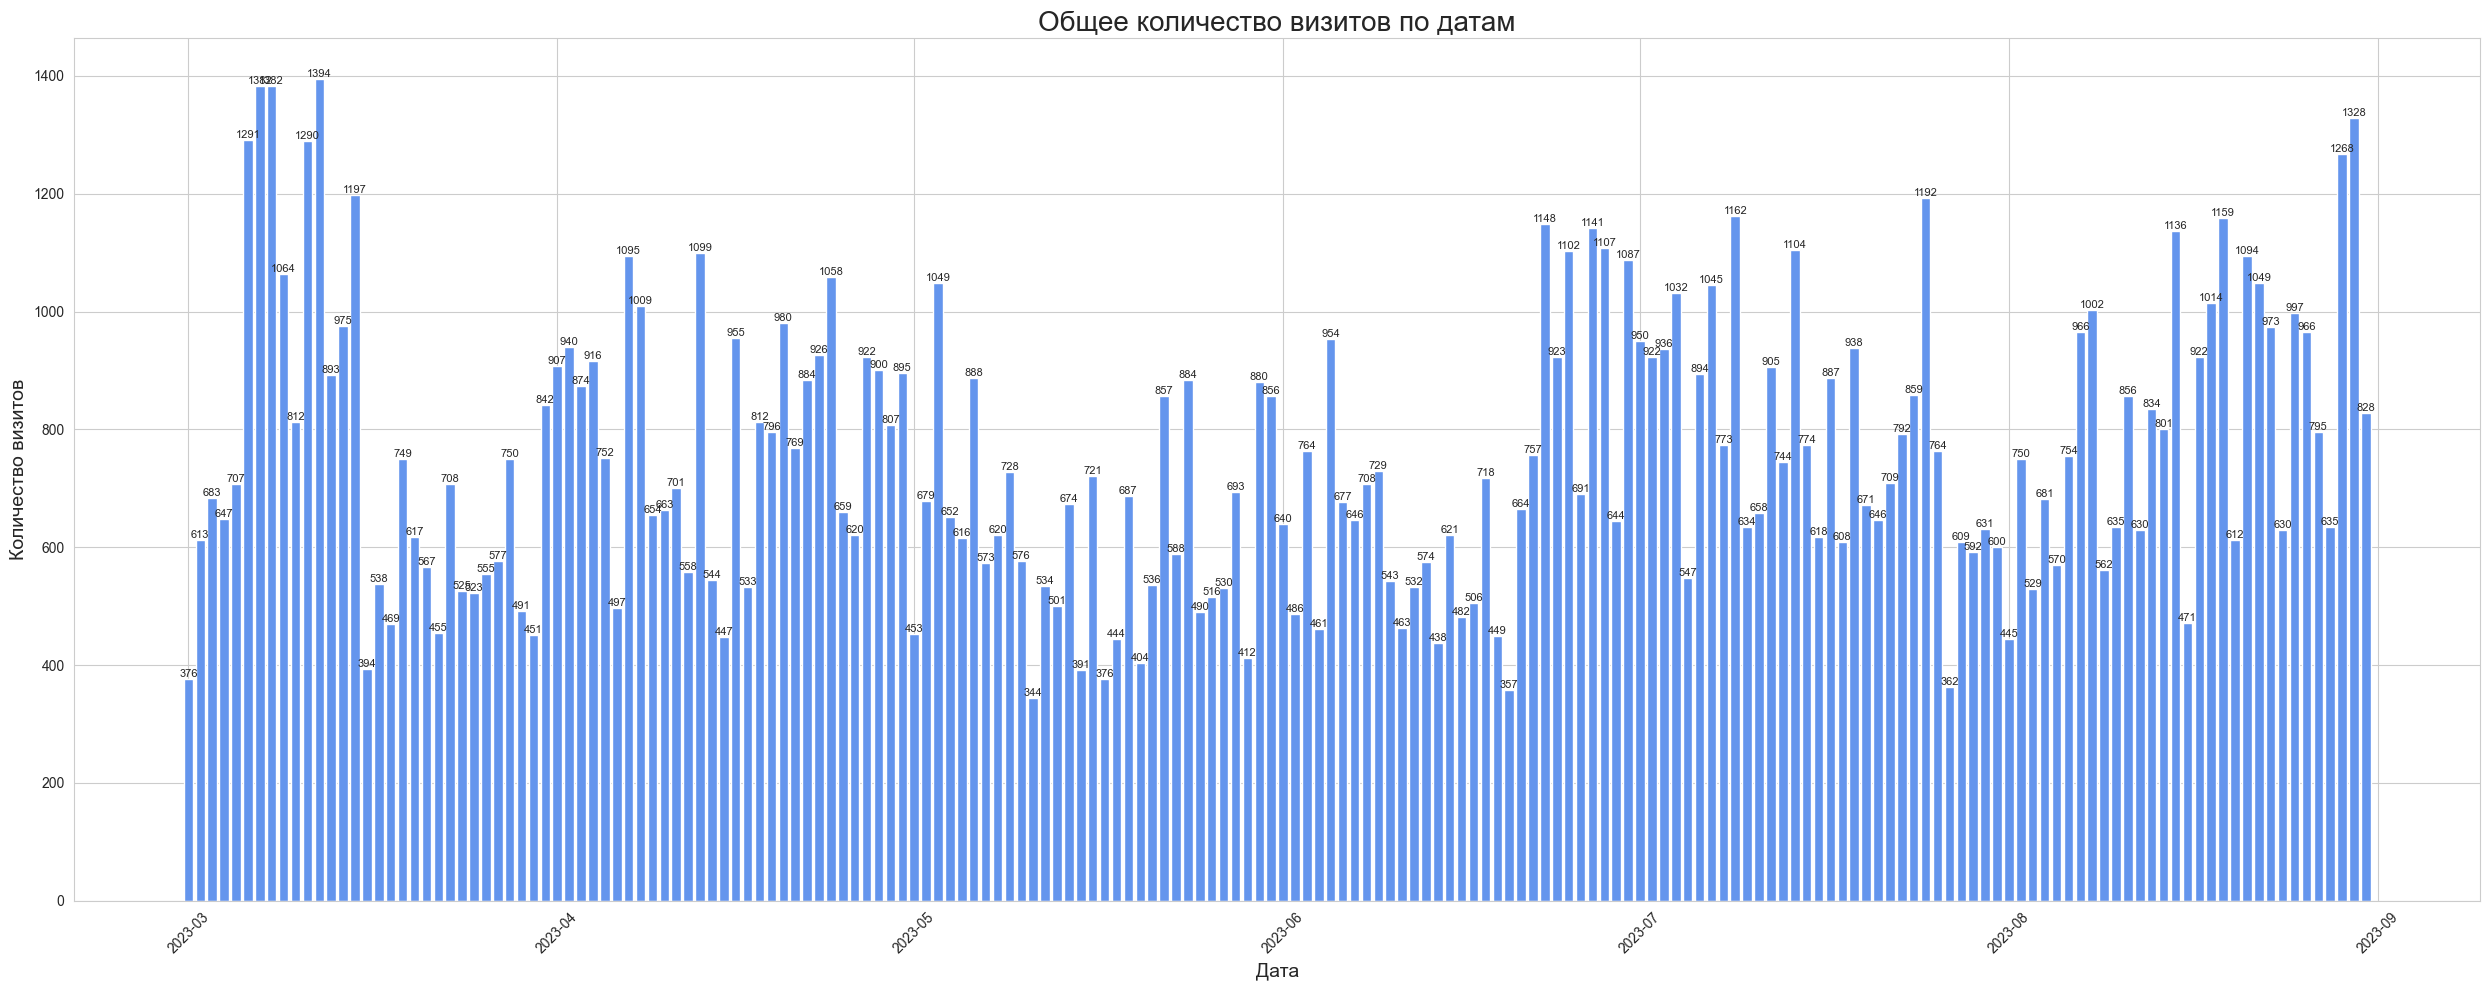

In [62]:
# Создаем визуализацию суммарного количества визитов
total_visits = final_ads_df.groupby('date_group')['visits'].sum().reset_index()

# Настраиваем размер изображения и стиль фона
fig, ax = plt.subplots(figsize=(25, 10))
sns.set_style("white")

# Строим столбчатый график с выбором цвета
plt.bar(total_visits['date_group'], total_visits['visits'], color='cornflowerblue')

# Добавляем подписи к столбцам графика для удобства интерпретации данных
ax.bar_label(ax.containers[0], fontsize=8)

# Устанавливаем параметры визуального отображения осей графика
plt.xticks(rotation=45, fontsize=10)  
plt.yticks(fontsize=10)  

# Настраиваем названия осей и заголовок графика
plt.title('Общее количество визитов по датам', fontsize=20)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Количество визитов', fontsize=14)

# Сохраняем график в файл
plt.tight_layout()  # Для корректного сохранения изображения
plt.savefig("charts/total_visits.png")

# Отображаем график
plt.show()

Итоговые визиты с разбивкой по платформам


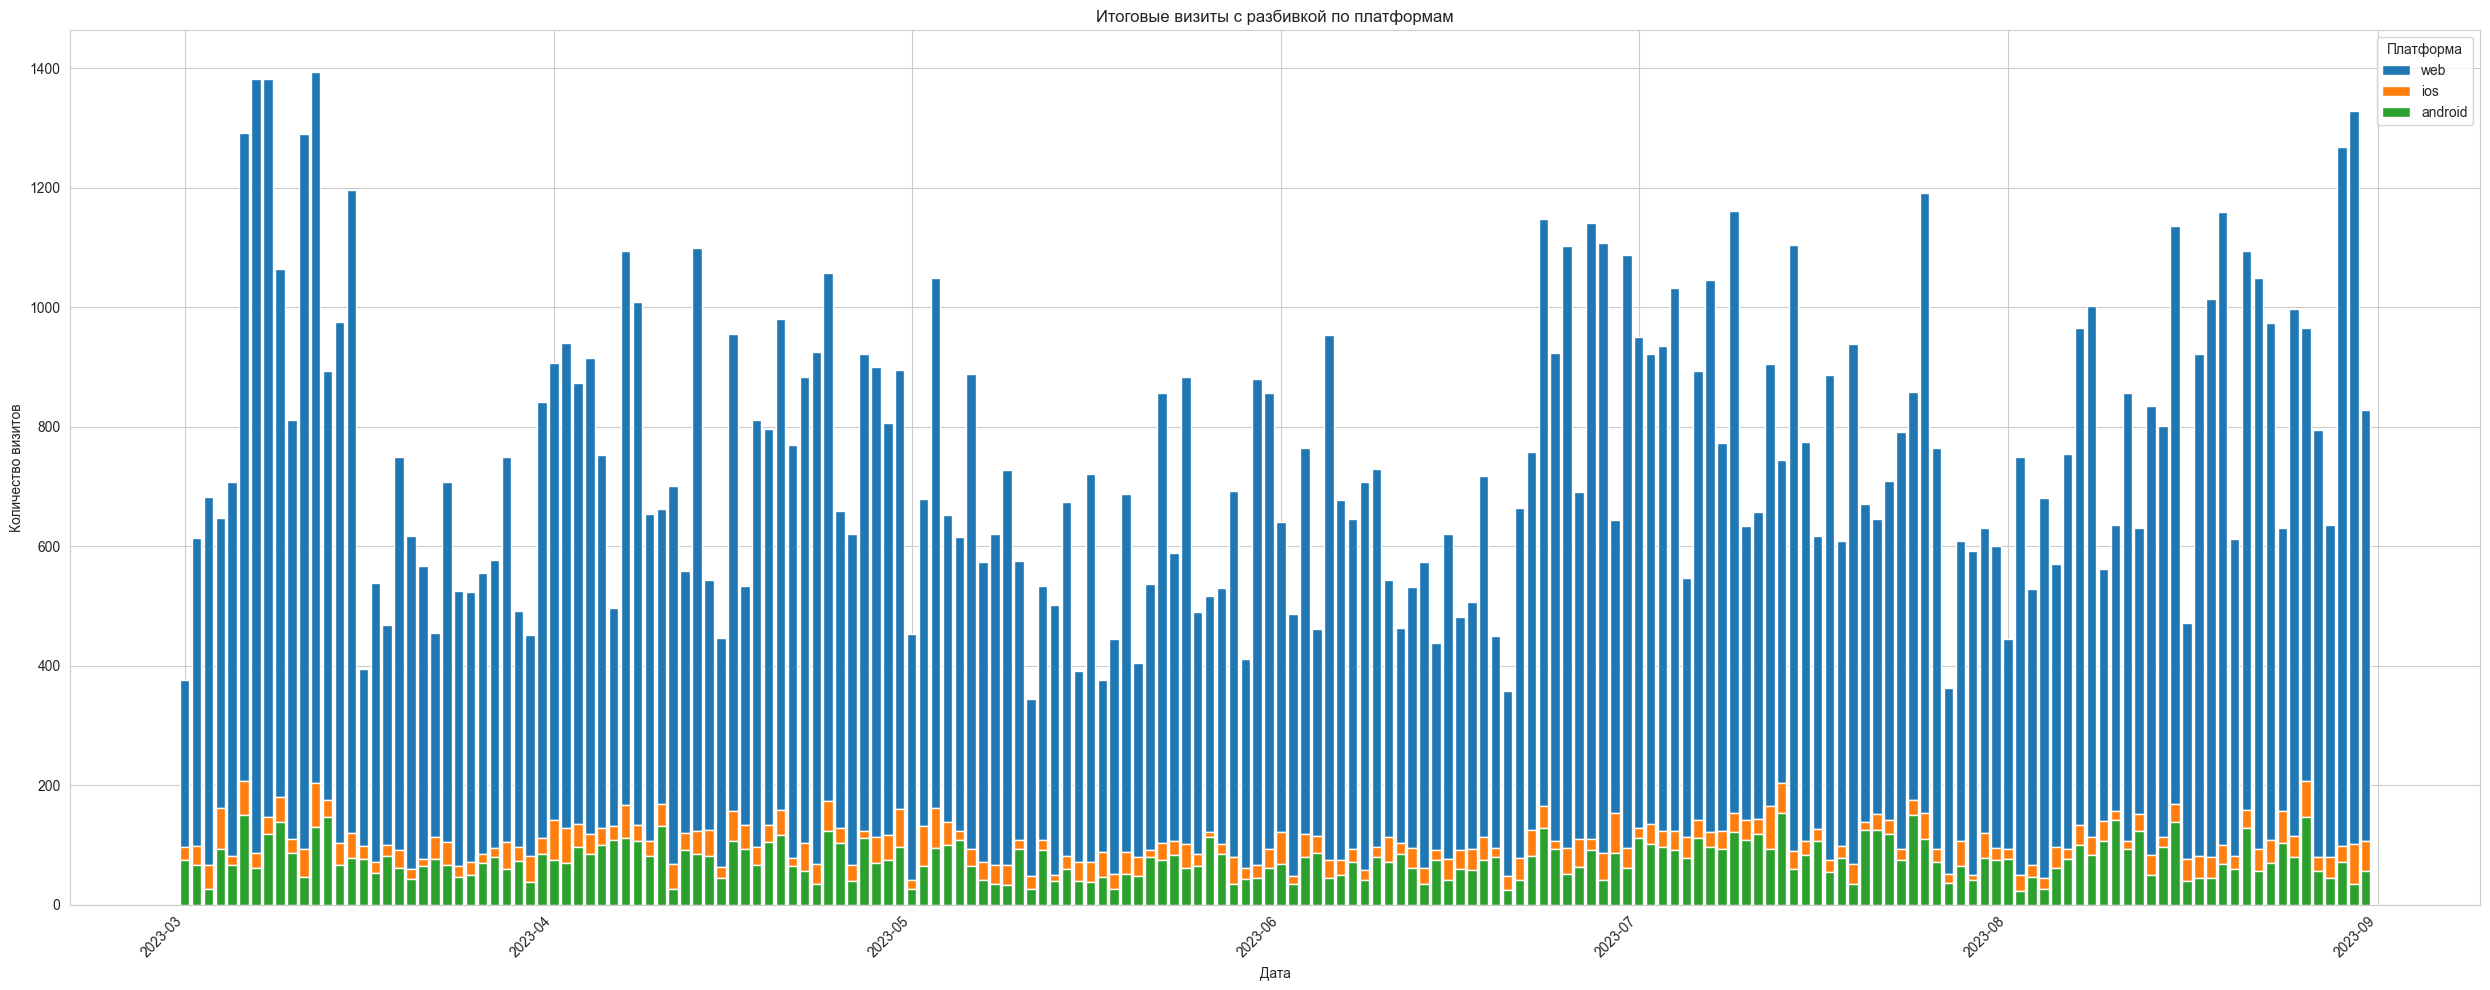

In [61]:
grouped = consolidated_data.groupby(['date_group', 'platform'])['visits'].sum().unstack(fill_value=0)

# Вычисляем кумулятивную сумму по колонкам, что необходимо для отображения накопленных значений на графике.
grouped_cumulative = grouped.cumsum(axis=1)

# Подготавливаем фигуру и оси для визуализации данных.
fig, ax = plt.subplots(figsize=(25, 10))

# Строим накопленные столбцы для каждой платформы, где каждый столбец будет представлять собой сумму визитов 
# за каждую дату, сложенную поверх предыдущих значений других платформ.
for platform in grouped.columns[::-1]:  
    ax.bar(grouped.index, grouped[platform], bottom=grouped_cumulative[platform] - grouped[platform], label=platform)

# Устанавливаем стиль сетки для лучшей читаемости графика и задаем параметры отображения меток осей.
sns.set_style("whitegrid")
plt.xticks(rotation=45, ha='right')  
plt.xlabel('Дата')  
plt.ylabel('Количество визитов')  
plt.title('Итоговые визиты с разбивкой по платформам')  

# Добавляем легенду, чтобы обозначить цвета, соответствующие каждой платформе.
plt.legend(title='Платформа')

# Сохраняем итоговый график в файл, предварительно убедившись, что все элементы графика поместятся на изображении.
plt.tight_layout()
plt.savefig('charts/visits_by_platform.png')

# Показываем график.
plt.show()

Итоговые регистрации по неделям

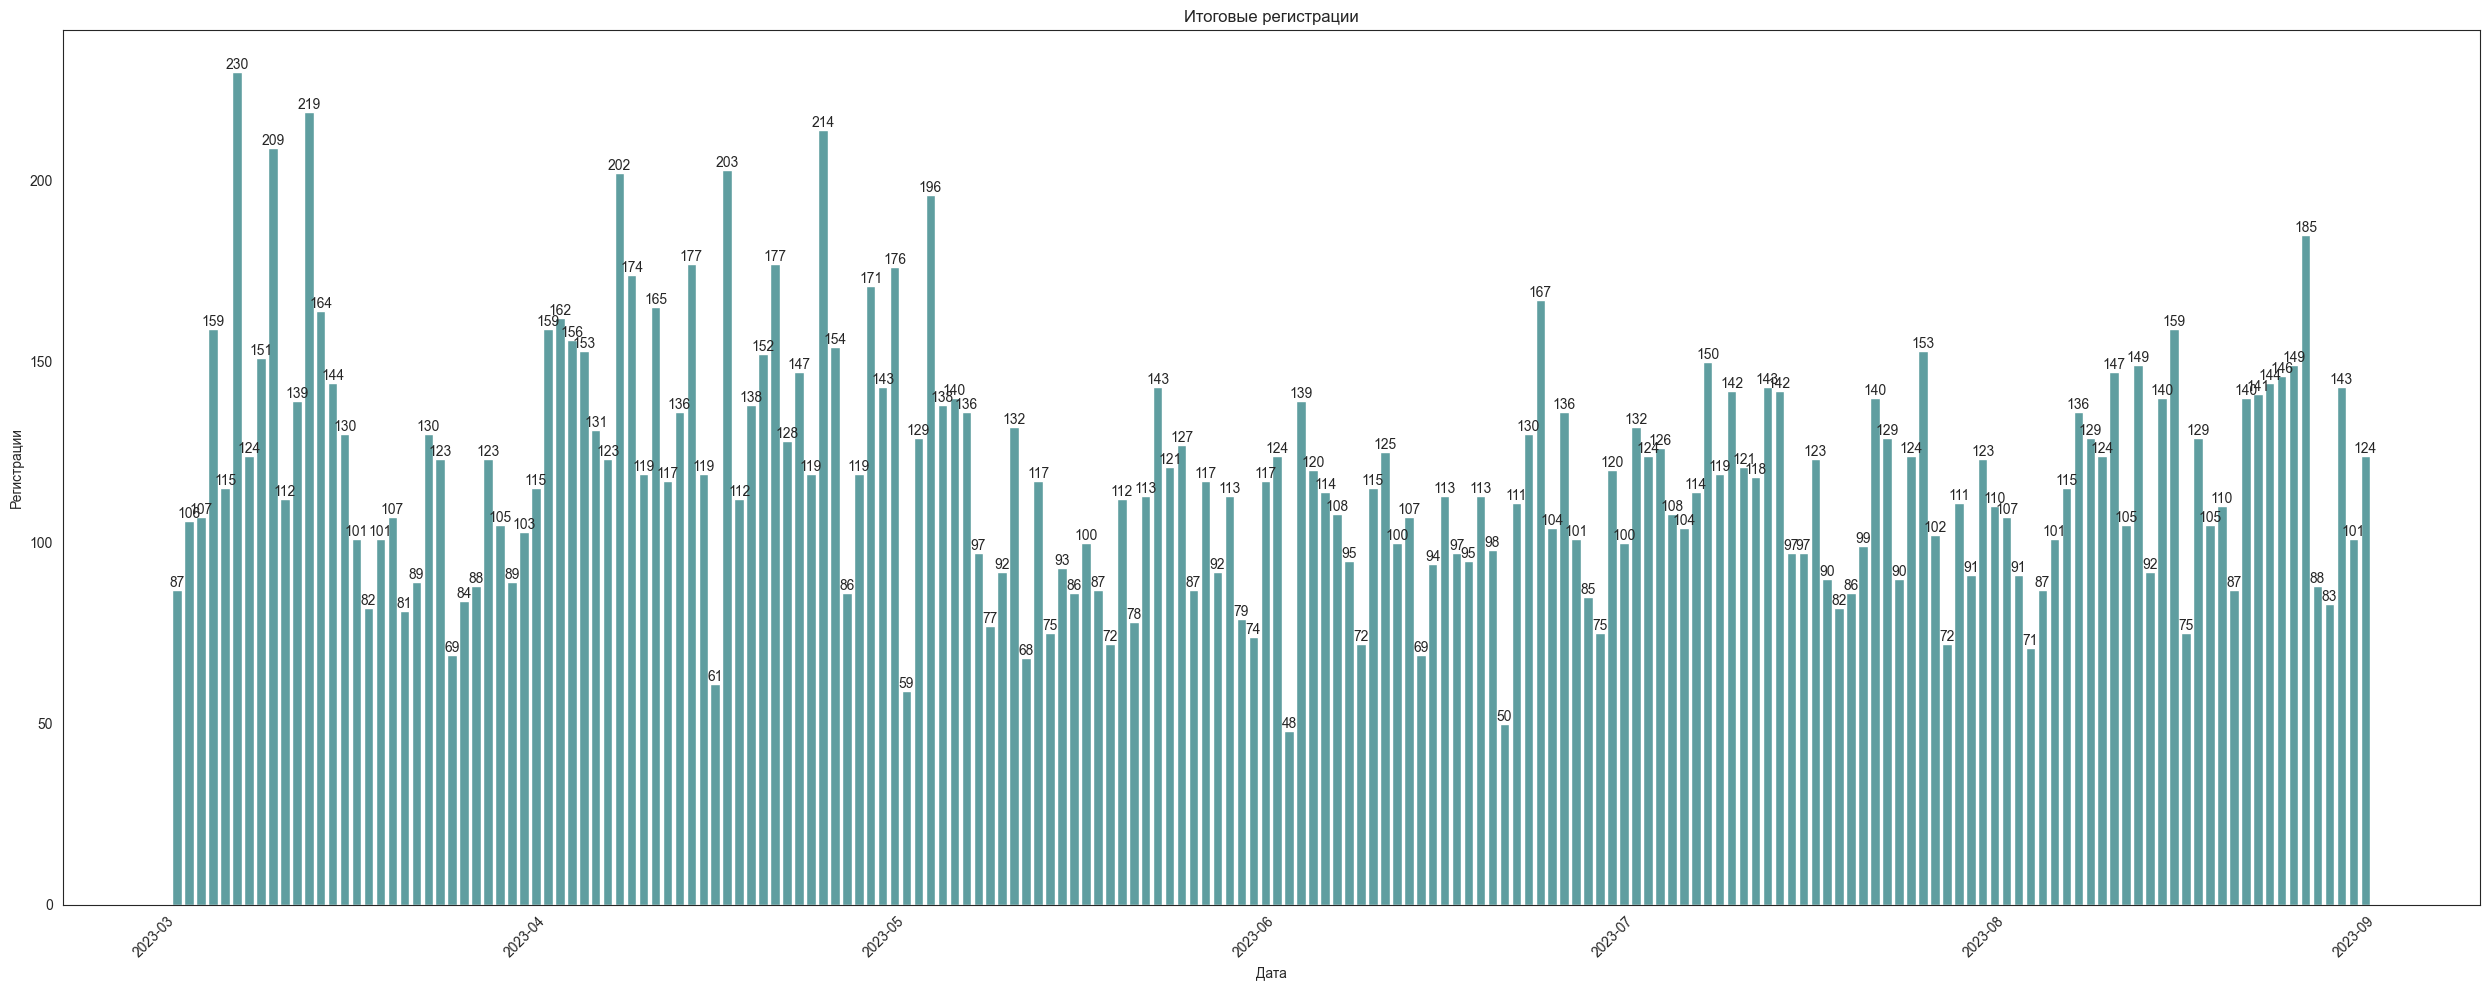

In [63]:
# Группируем данные по дате, считаем суммарное количество регистраций для каждой даты.
total_registrations = consolidated_data.groupby('date_group')['registrations'].sum().reset_index()

# Создаем визуализацию для итогового количества регистраций
fig, ax = plt.subplots(figsize=(25, 10))
# Строим столбчатый график, используя цветовую схему Seaborn
plt.bar(total_registrations['date_group'], total_registrations['registrations'], color='cadetblue')

# Добавляем подписи к столбцам для удобства чтения значений
ax.bar_label(ax.containers[0], fontsize=10)

# Устанавливаем параметры визуального отображения осей
sns.set_style("whitegrid")
plt.xticks(rotation=45, ha='right')  
plt.xlabel('Дата')  
plt.ylabel('Регистрации')  
plt.title('Итоговые регистрации') 

# Сохраняем и отображаем график
plt.tight_layout()
plt.savefig('charts/total_weekly_reg.png')
plt.show()

Итоговые регистрации с разбивкой по платформе

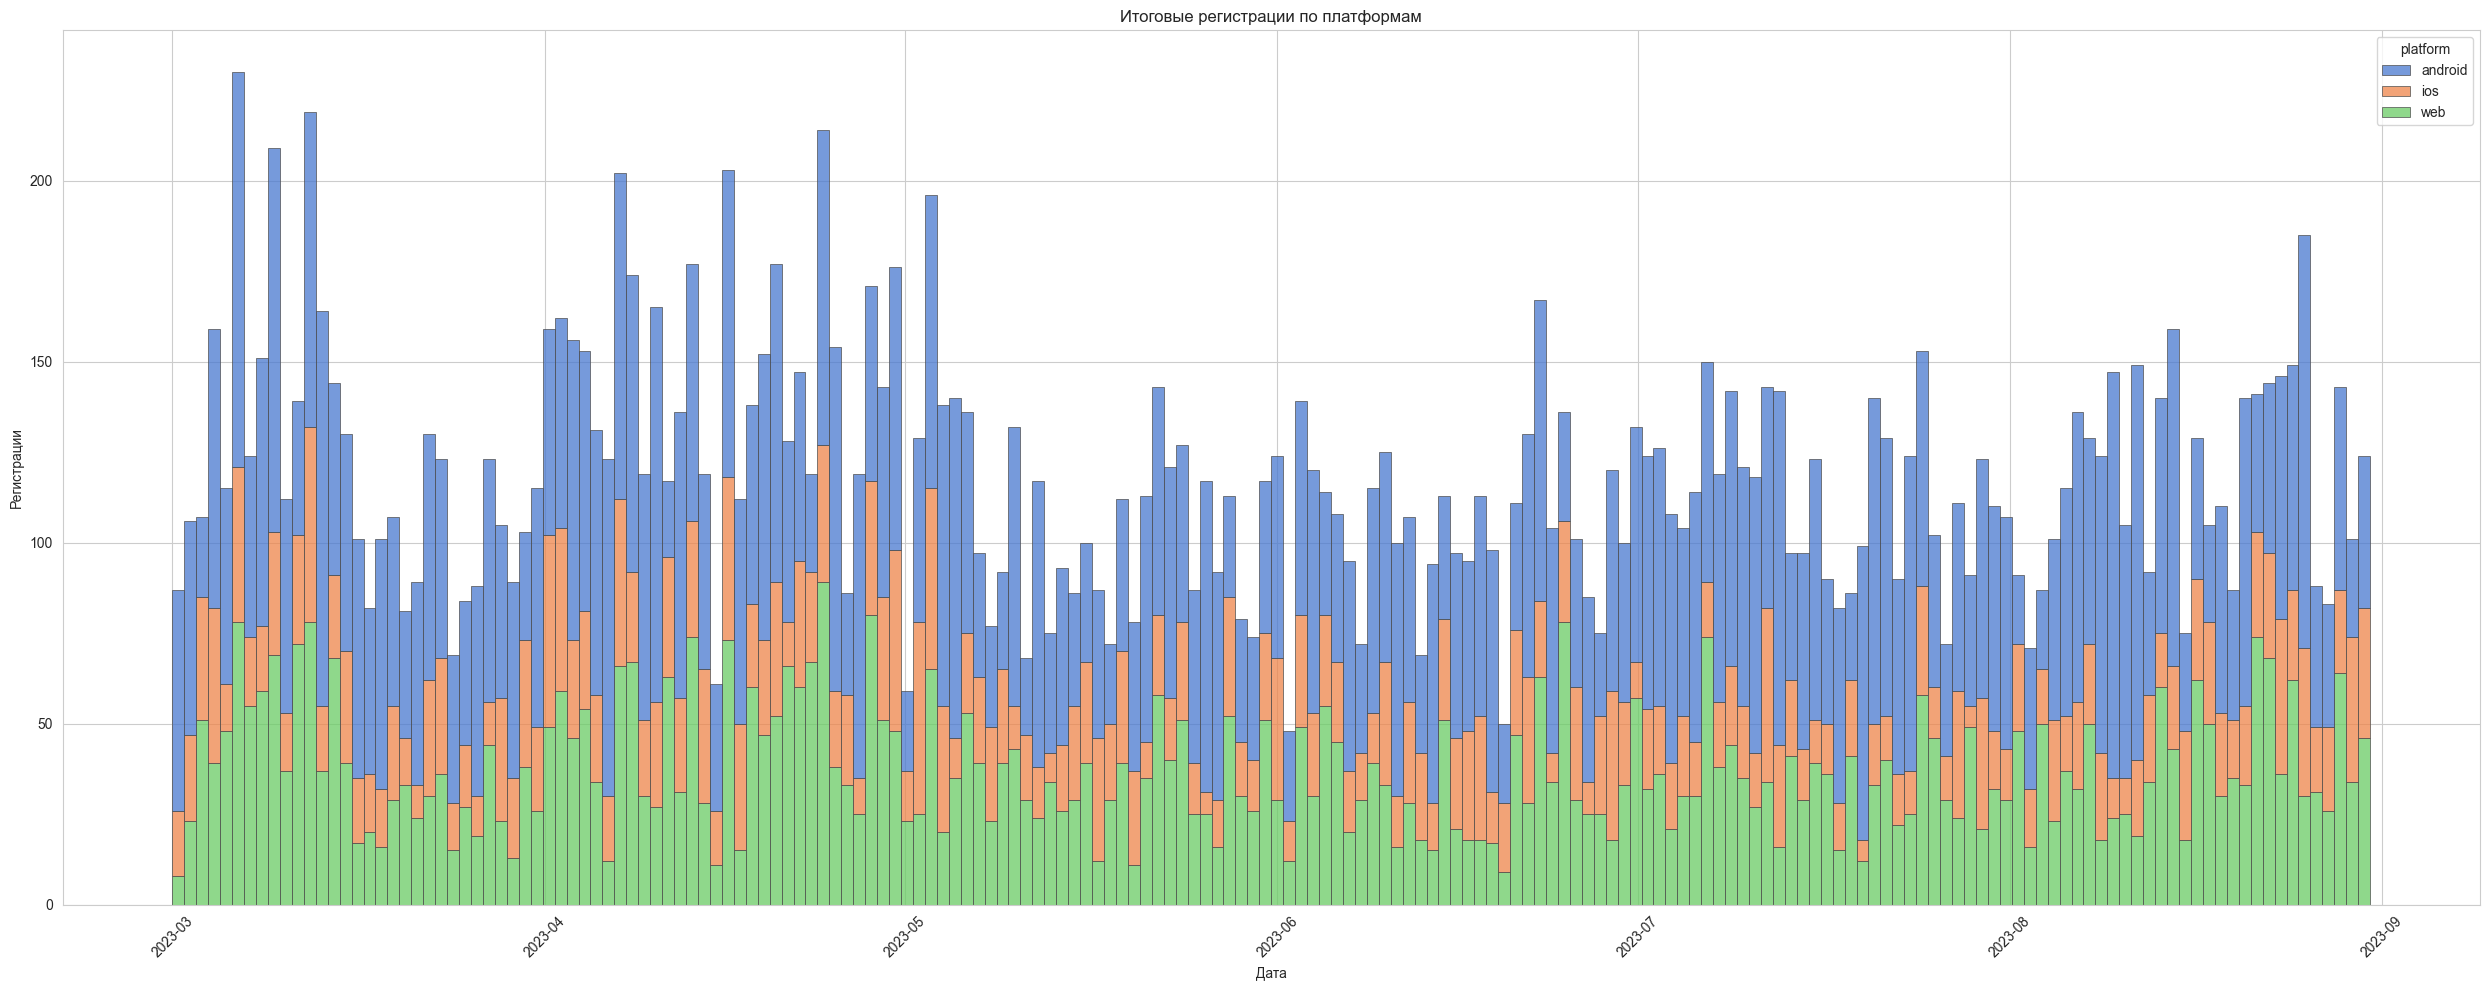

In [64]:
# Группировка данных регистраций по дате и типу платформы
grouped_registrations = consolidated_data.groupby(['date_group', 'platform'])['registrations'].sum().reset_index()

# Создание фигуры и осей для визуализации
fig, ax = plt.subplots(figsize=(25, 10))

# Построение гистограммы с накоплением
sns.histplot(
    data=grouped_registrations, 
    x='date_group', 
    weights='registrations', 
    hue='platform', 
    multiple='stack',
    palette='muted',
    bins=len(grouped_registrations['date_group'].unique()),  
    edgecolor='.3',
    linewidth=.5
)

# Настройка стилей и меток
sns.set_style("whitegrid")
plt.xticks(rotation=45)  
plt.xlabel('Дата')  
plt.ylabel('Регистрации')  
plt.title('Итоговые регистрации по платформам')  

# Проверка и добавление легенды
handles, labels = ax.get_legend_handles_labels()
if handles:
    ax.legend(handles=handles, title='Платформа')

# Сохранение изображения графика в файл
plt.tight_layout()  
plt.savefig('charts/total_registrations_by_platform.png')

# Отображение графика
plt.show()

Итоговые конверсии

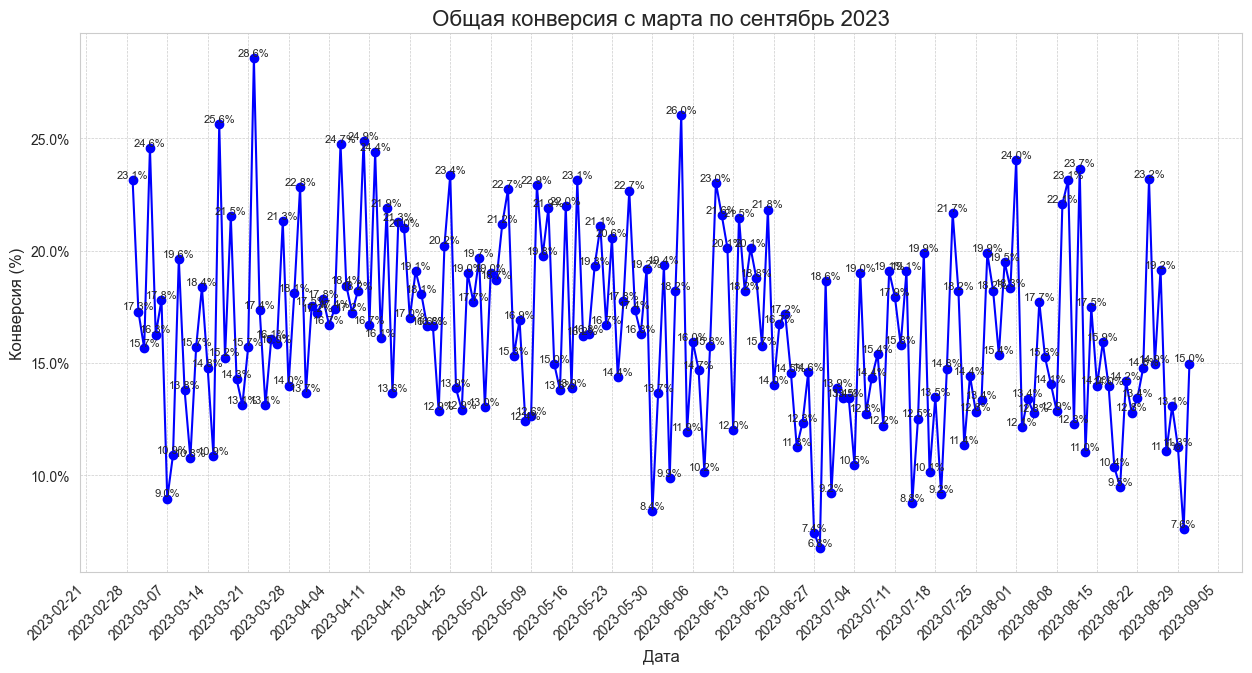

In [65]:
# Преобразование столбца 'date_group' в формат datetime для удобства работы с датами
final_ads_df['date_group'] = pd.to_datetime(final_ads_df['date_group'])

# Фильтрация данных для включения только дат между мартом и сентябрем 2023 года
final_ads_df = final_ads_df[(final_ads_df['date_group'] >= '2023-03-01') & (final_ads_df['date_group'] <= '2023-09-30')]

# Группировка данных по 'date_group' и подсчет суммарного количества посещений и регистраций
visits_per_day = final_ads_df.groupby('date_group').agg({'visits': 'sum'})
registrations_per_day = final_ads_df.groupby('date_group').agg({'registrations': 'sum'})

# Расчет общей конверсии как отношение количества регистраций к посещениям, умноженное на 100
total_conversion = (registrations_per_day['registrations'] / visits_per_day['visits'] * 100).reset_index()
total_conversion = total_conversion.rename(columns={0: 'conversion'})

# Построение графика общей конверсии
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(total_conversion['date_group'], total_conversion['conversion'],
        marker='o', linestyle='-', color='blue')

# Установка форматтера для оси Y в процентах
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Добавление подписей к точкам на графике
for x, y in zip(total_conversion['date_group'], total_conversion['conversion']):
    ax.text(x, y, f'{y:.1f}%', ha='center', va='bottom', fontsize=8)

# Настройка внешнего вида графика: заголовок, подписи осей, сетка
ax.set_xlabel('Дата', fontsize=12)
ax.set_ylabel('Конверсия (%)', fontsize=12)
ax.set_title('Общая конверсия с марта по сентябрь 2023', fontsize=16)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, ha='right')

plt.savefig('charts/conversion.png')
# Показываем график
plt.show()


Конверсия по каждой платформе


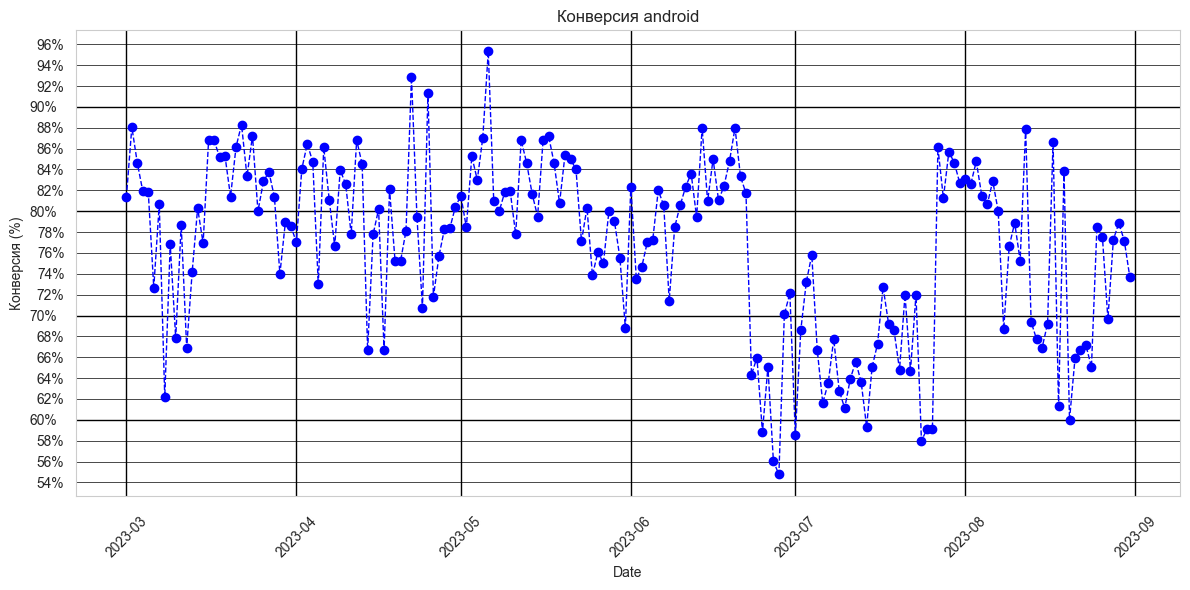

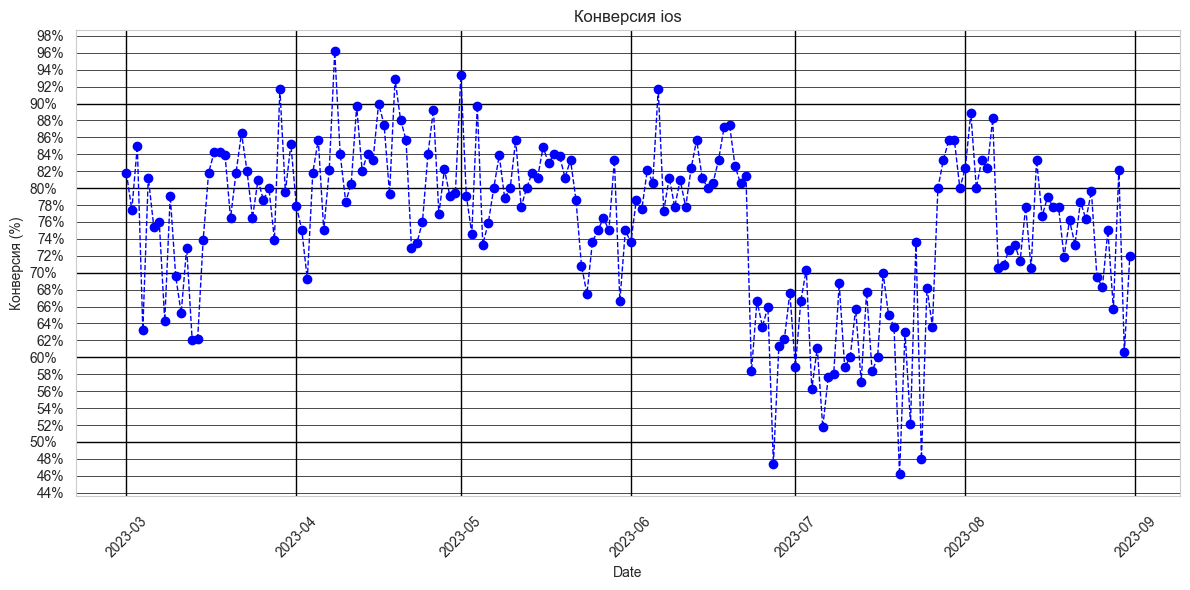

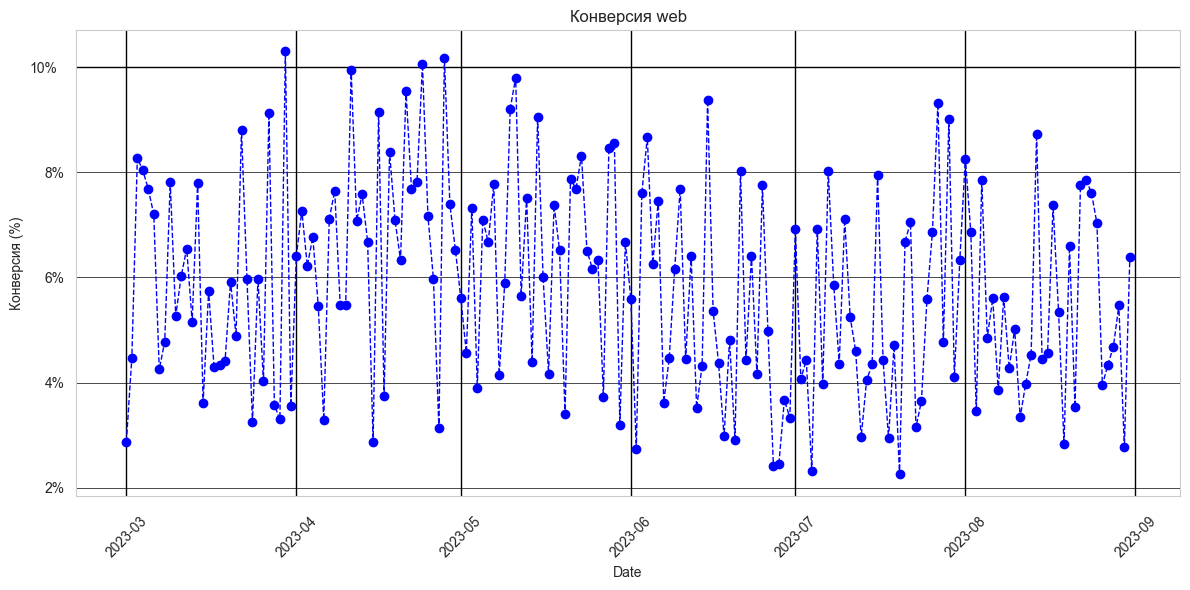

In [66]:
# Конвертация 'date_group' из формата времени эпохи в удобочитаемый формат даты
consolidated_data['date_group'] = pd.to_datetime(consolidated_data['date_group'], unit='ms')

def platform_conversion(consolidated_data, platform):
    # Фильтрация данных по платформе
    consolidated_data_platform = consolidated_data[consolidated_data['platform'] == platform]

    # Создание фигуры для графика 
    fig, ax = plt.subplots(figsize=(12, 6))
    # Построение графика конверсии: дата на оси X и конверсия на оси Y
    ax.plot(consolidated_data_platform['date_group'], consolidated_data_platform['conversion'],
            color='blue', 
            marker='o',
            linestyle='dashed', 
            linewidth=1, 
            markersize=6) 
    ax.grid() 
    ax.set_xlabel('Date') 
    ax.set_ylabel('Конверсия (%)') 
    plt.title(f'Конверсия {platform}') 
    plt.xticks(rotation=45) 
    plt.grid()
   
    # Настройка основных и дополнительных делений на оси Y
    ax.yaxis.set_major_locator(MultipleLocator(10)) 
    ax.yaxis.set_major_formatter('{x:.0f}%') 

    ax.yaxis.set_minor_locator(MultipleLocator(2)) 
    ax.yaxis.set_minor_formatter('{x:.0f}%') 

    # Настройка стиля сетки
    ax.grid(which='major', color='black', linewidth=1) 
    ax.grid(which='minor', color='black', linewidth=0.5) 

    # Настройка внешнего вида делений на осях
    ax.tick_params(which='major', length=10)
    ax.tick_params(which='minor', length=5)

    plt.tight_layout() 
    plt.savefig(f"charts/{platform}_conversion.png")
    plt.show() 

# Построение графика конверсии для каждой платформы
for platform in consolidated_data['platform'].unique():
    platform_conversion(consolidated_data, platform)

Стоимости реклам

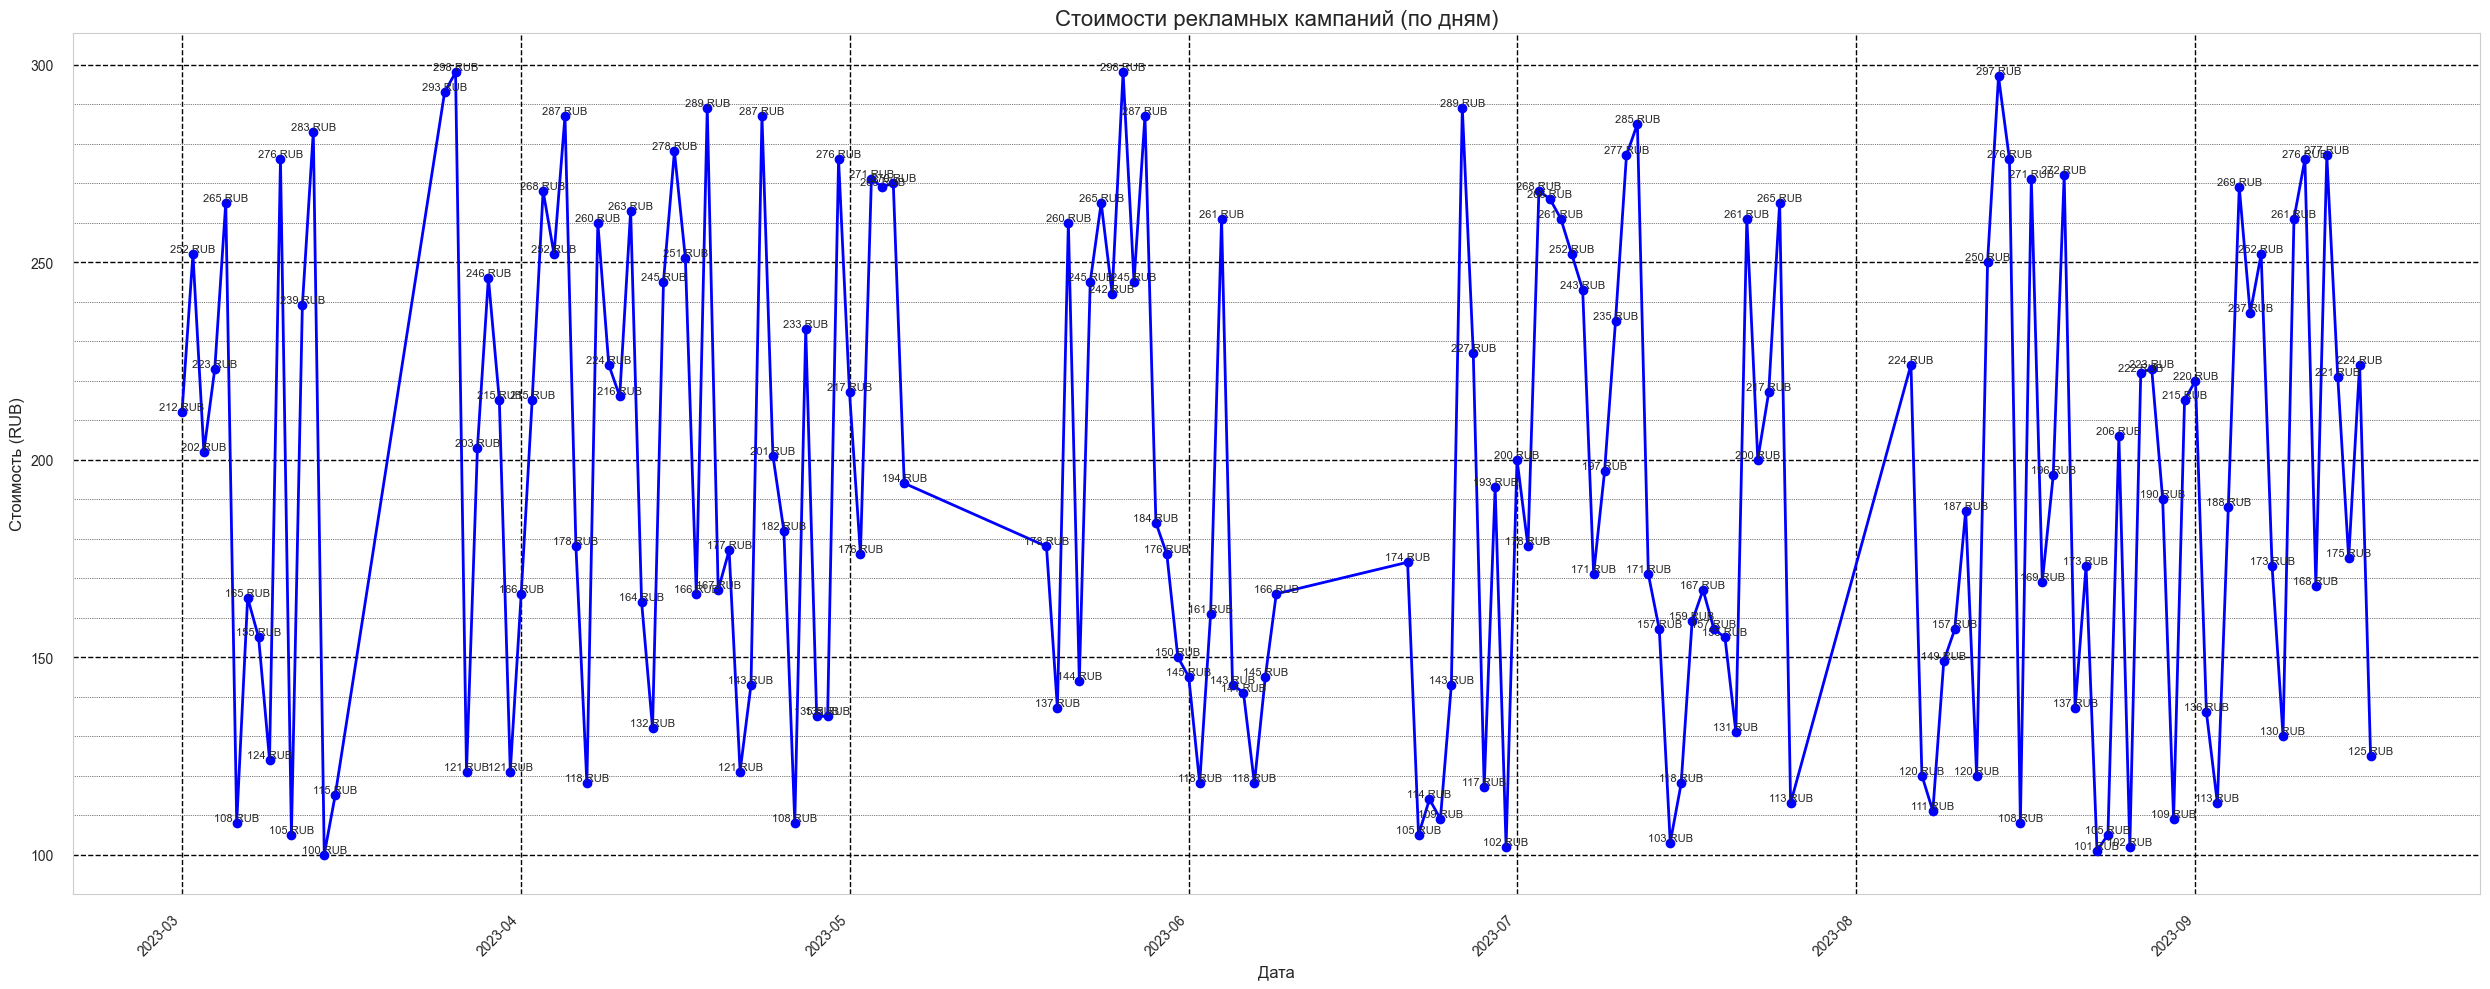

In [67]:
# Построение графика стоимости рекламных кампаний с указанием стоимости сверху
plt.figure(figsize=(25, 10))  # Задаем размер графика

# Строим линейный график стоимости
plt.plot(ads_grouped_by_day['date_group'], ads_grouped_by_day['cost'],
         color='blue',  
         marker='o',  
         linestyle='-',  
         linewidth=2,  
         markersize=6)  

# Добавляем аннотации с затратами над каждой точкой
for i, (date, cost) in enumerate(zip(ads_grouped_by_day['date_group'], ads_grouped_by_day['cost'])):
    plt.text(date, cost, f'{cost} RUB', ha='center', va='bottom', fontsize=8)

# Добавляем сетку, метки осей и заголовок
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Стоимость (RUB)', fontsize=12)
plt.title('Стоимости рекламных кампаний (по дням)', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Поворот меток дат на оси X

# Настраиваем отображение тиков и сетки на оси Y
plt.gca().yaxis.set_major_locator(MultipleLocator(50))  
plt.gca().yaxis.set_minor_locator(MultipleLocator(10))  
plt.gca().grid(which='major', color='black', linewidth=1)  
plt.gca().grid(which='minor', color='black', linestyle=':', linewidth=0.5)  
plt.gca().tick_params(which='major', length=10)  
plt.gca().tick_params(which='minor', length=4)  

# Показываем и сохраняем график 
plt.tight_layout()
plt.savefig('charts/aggregated_campaign_costs.png')
plt.show()

Визиты за весь период с цветовым выделением рекламной кампании

C:\Users\Вика\AppData\Local\Temp\ipykernel_8824\2203475681.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ads_periods = visits_from_utm_campaign[['utm_campaign', 'date_group']].groupby('utm_campaign').apply(lambda x : x.loc[(x['date_group'] == x['date_group'].min()) | (x['date_group'] == x['date_group'].max())]).reset_index(drop=True)


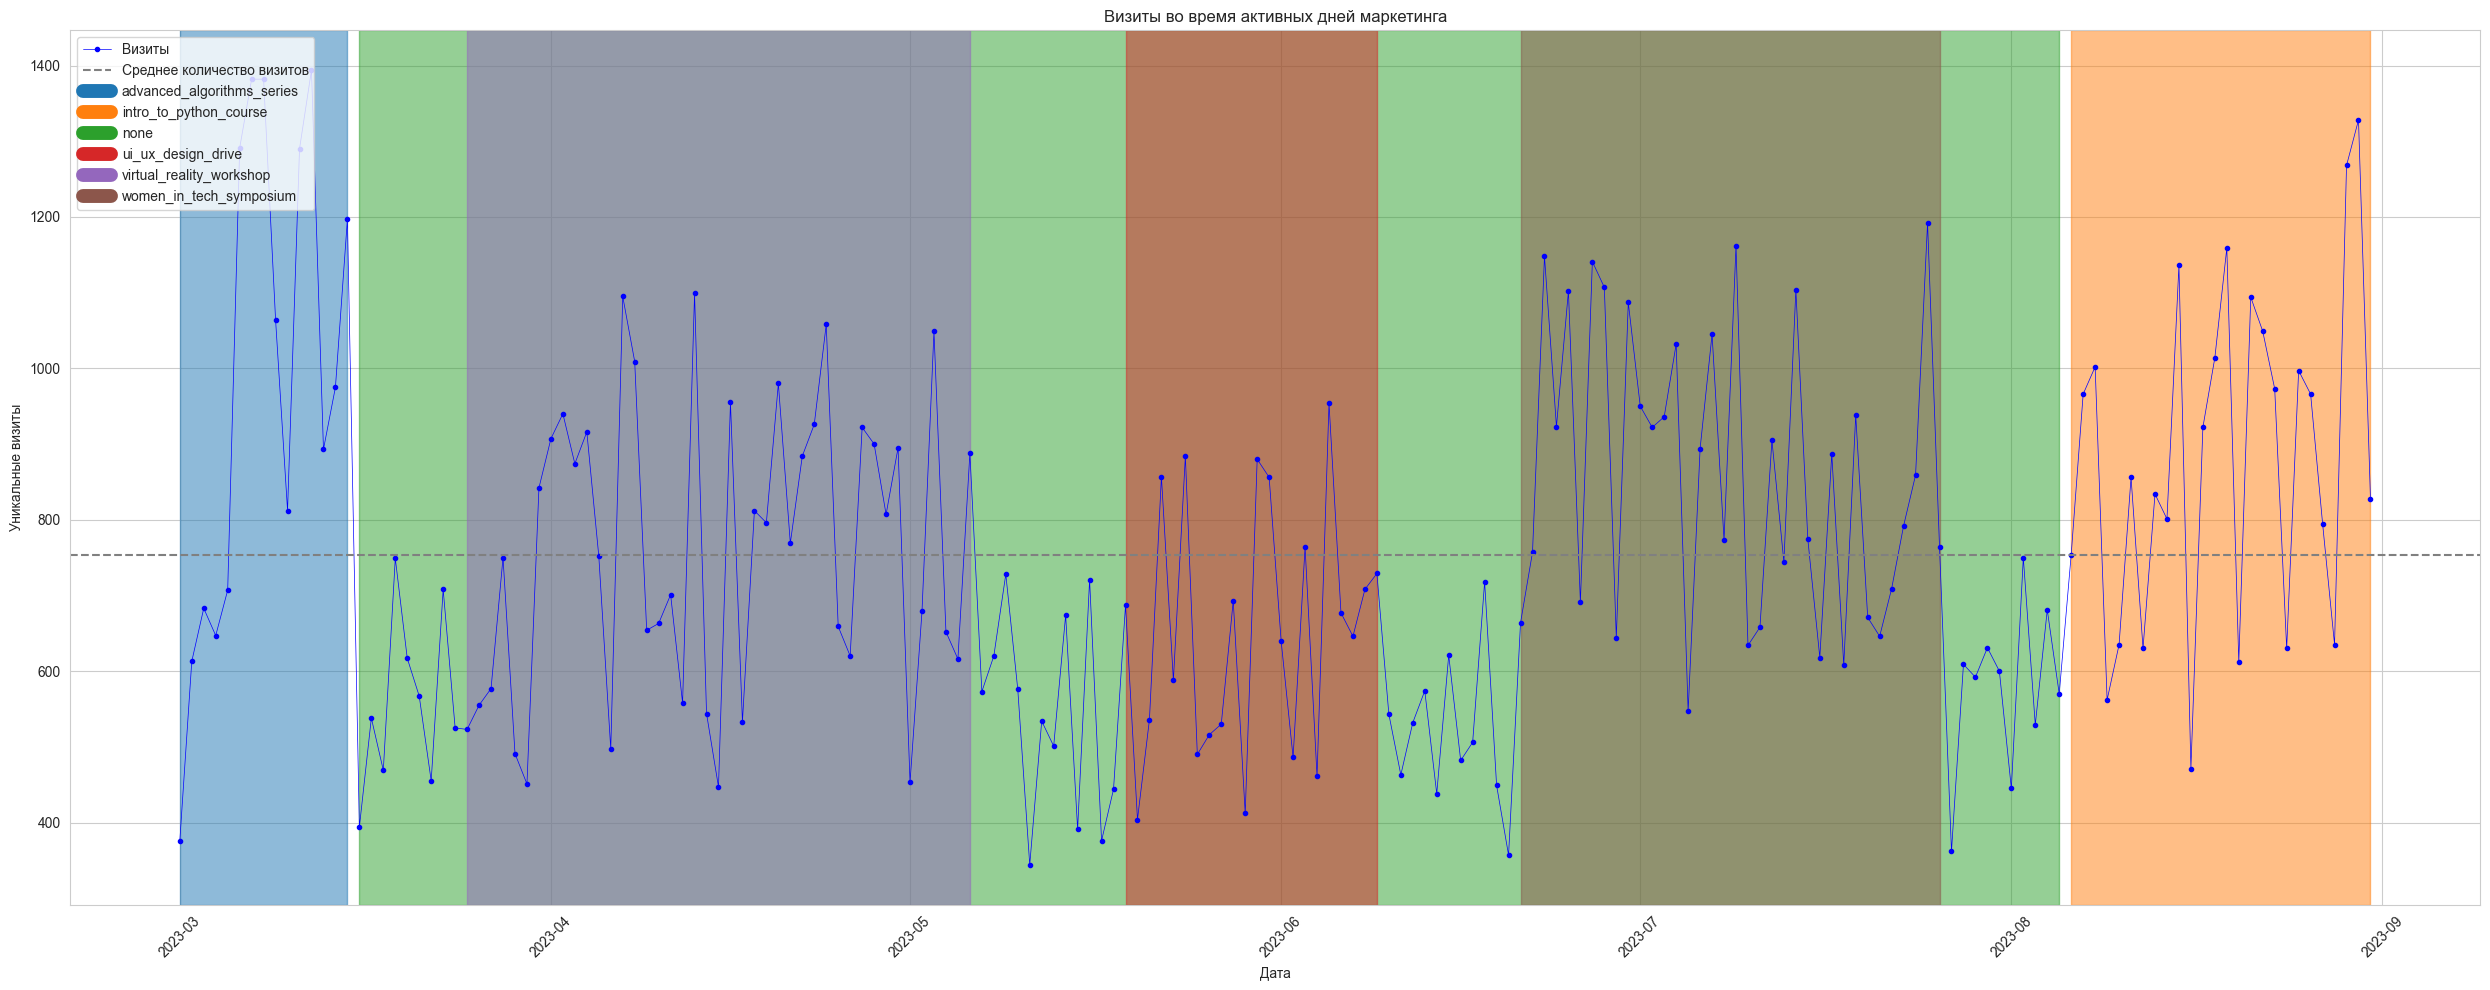

In [68]:
visits_from_utm_campaign = final_ads_df.groupby(['date_group', 'utm_campaign']).agg({'visits':'sum'}).reset_index()
ads_periods = visits_from_utm_campaign[['utm_campaign', 'date_group']].groupby('utm_campaign').apply(lambda x : x.loc[(x['date_group'] == x['date_group'].min()) | (x['date_group'] == x['date_group'].max())]).reset_index(drop=True)
ads_start = ads_periods.groupby('utm_campaign')['date_group'].agg('min').reset_index()
ads_start.columns = ['utm_campaign', 'start'] 
ads_end = ads_periods.groupby('utm_campaign')['date_group'].agg('max').reset_index()
ads_end.columns = ['utm_campaign', 'end'] 
ads_from_start_to_end = ads_start.merge(ads_end)
ads_from_start_to_end['start'] = pd.to_datetime(ads_from_start_to_end['start'], format='%Y-%m-%d')
ads_from_start_to_end['end'] = pd.to_datetime(ads_from_start_to_end['end'], format='%Y-%m-%d')
ads_from_start_to_end = ads_from_start_to_end.replace(['2023-04-06'],'2023-04-05')
ads_from_start_to_end = ads_from_start_to_end.replace(['2023-04-08'],'2023-04-09')
ads_from_start_to_end = ads_from_start_to_end.replace(['2023-07-28'],'2023-07-29')

# Построение графика визитов с выделением рекламных кампаний
fig, ax = plt.subplots(figsize=(25, 10))

# Построение графика визитов
ax.plot(visits_from_utm_campaign['date_group'], visits_from_utm_campaign['visits'], color='blue', label='Визиты',
         marker='o', linewidth=0.5, ms=3)

# Вычисление и отображение среднего количества визитов
average_visits = visits_from_utm_campaign['visits'].mean()
ax.axhline(y=average_visits, color='gray', linestyle='--', label="Среднее количество визитов")

# Используем уникальные цвета из TABLEAU_COLORS для создания словаря соответствия кампании и цвета
campaign_colors = dict(zip(ads_from_start_to_end['utm_campaign'].unique(), colors.TABLEAU_COLORS.values()))

# Цикл для выделения периодов рекламных кампаний
for _, row in ads_from_start_to_end.iterrows():
    ax.axvspan(row['start'], row['end'], color=campaign_colors[row['utm_campaign']], alpha=0.5)
    ax.plot([], [], color=campaign_colors[row['utm_campaign']], linewidth=10, label=row['utm_campaign'])

# Добавление легенды с учетом выделения кампаний
ax.legend(loc='upper left')

# Дополнительные настройки графика
plt.title('Визиты во время активных дней маркетинга')
plt.xlabel('Дата')
plt.ylabel('Уникальные визиты')
plt.xticks(rotation=45)
plt.tight_layout()

# Показываем график
plt.savefig('charts/visits_active_days.png')
plt.show()

Регистрации за весь период с цветовым выделением рекламной кампании

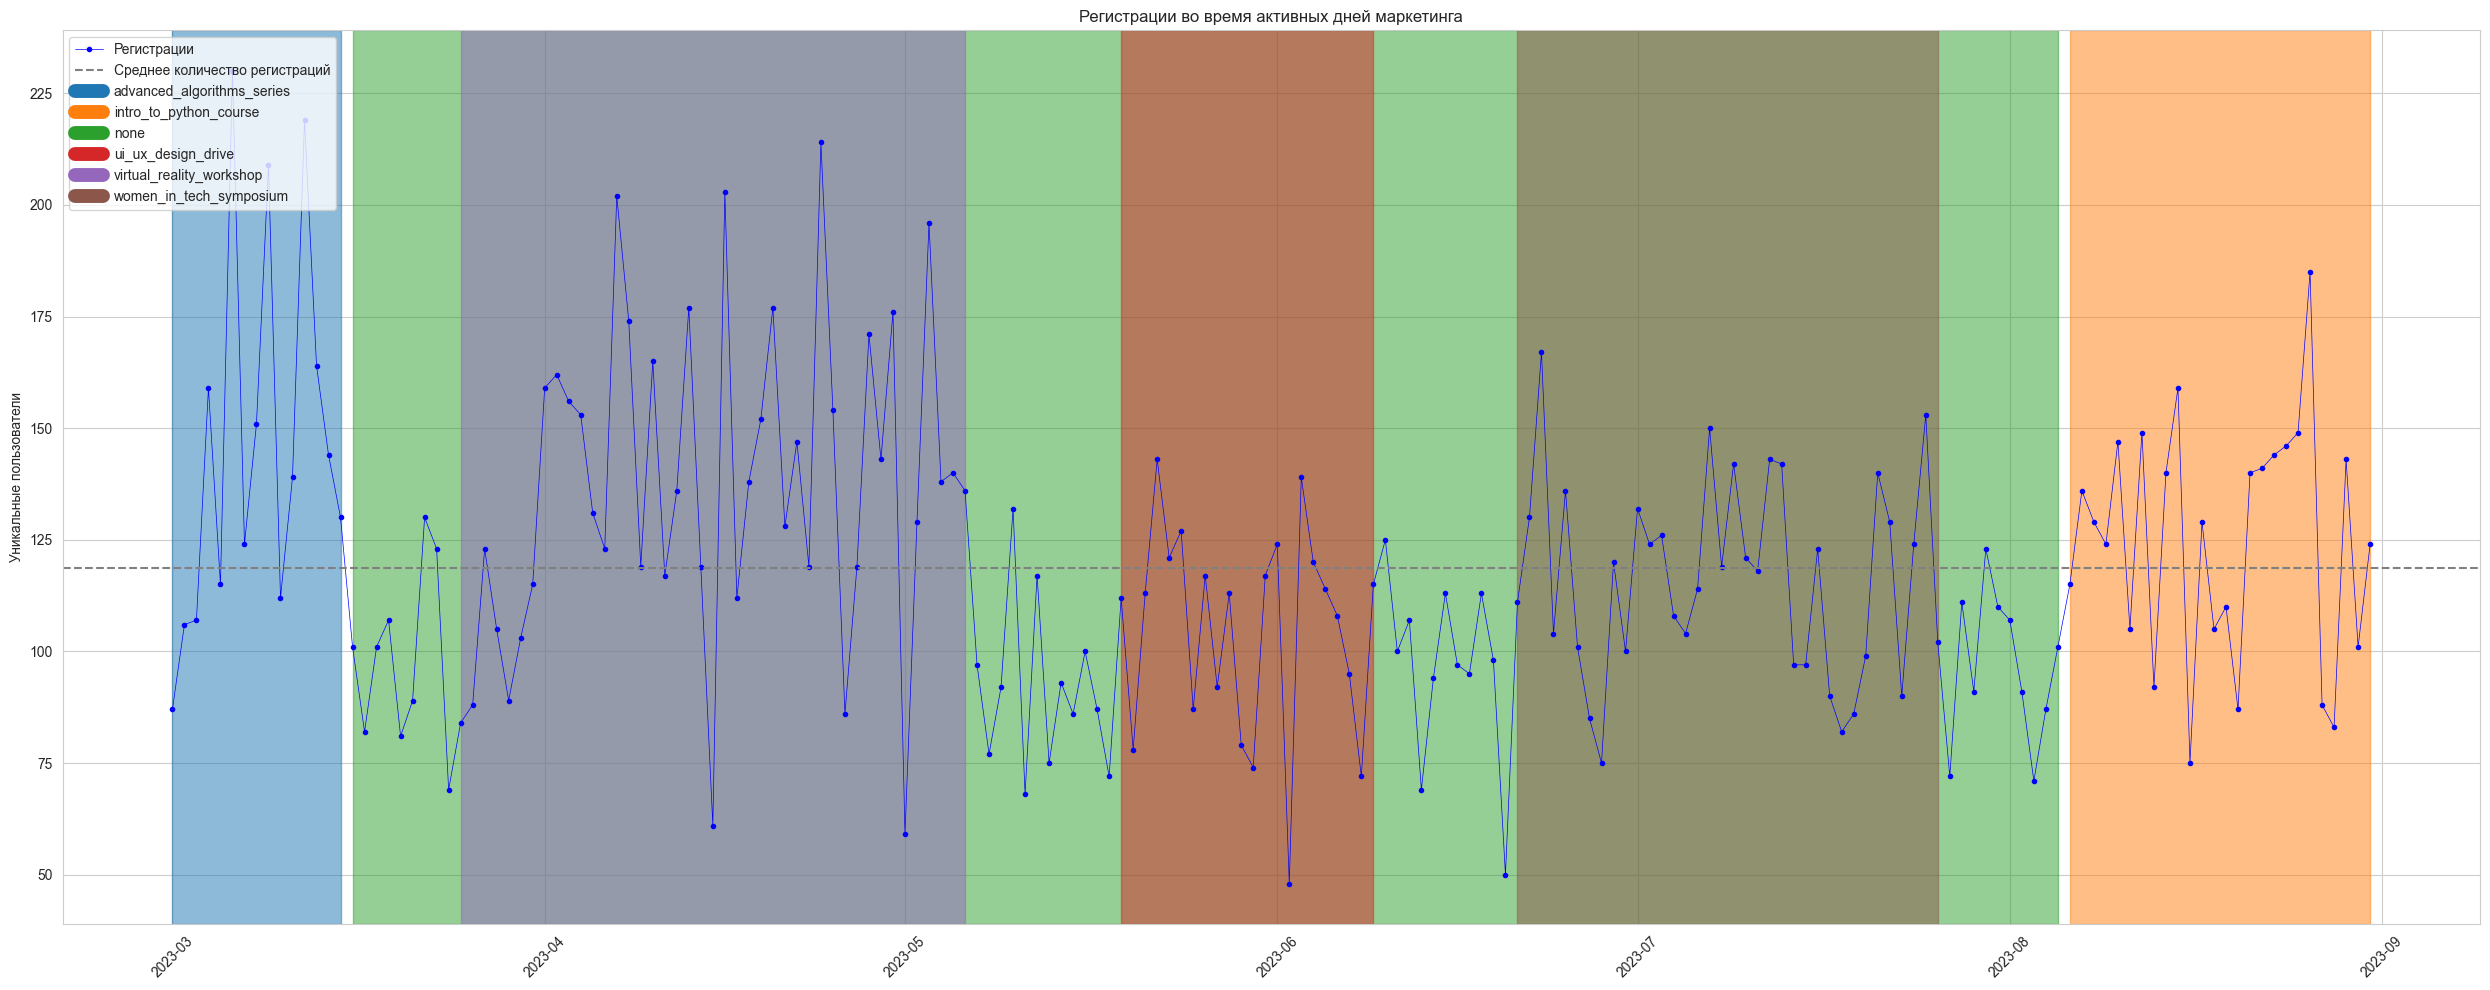

In [69]:
# Группировка данных по дате и рекламной кампании для подсчета суммарного количества регистраций
registrations_from_utm_campaign = final_ads_df.groupby(['date_group', 'utm_campaign']).agg({'registrations':'sum'}).reset_index()

# Создание фигуры для графика
plt.figure(figsize=(25, 10))
plt.title('Регистрации во время активных дней маркетинга')
plt.ylabel('Уникальные пользователи')
plt.xticks(rotation=45)

# Построение графика регистраций
plt.plot(registrations_from_utm_campaign['date_group'], registrations_from_utm_campaign['registrations'], color='blue', label='Регистрации',
         marker='o', linewidth=0.5, ms=3)

# Вывод среднего количества регистраций
plt.axhline(y=registrations_from_utm_campaign['registrations'].mean(), color='gray', linestyle='--', label="Среднее количество регистраций")

# Создание словаря цветов для каждой рекламной кампании
campaign_colors = dict(zip(ads_from_start_to_end['utm_campaign'].unique(), colors.TABLEAU_COLORS.values()))

# Выделение на графике периодов рекламных кампаний
for _, row in ads_from_start_to_end.iterrows():
    plt.axvspan(row['start'], row['end'], color=campaign_colors[row['utm_campaign']], alpha=0.5)
    plt.plot([], [], color=campaign_colors[row['utm_campaign']], linewidth=10, label=row['utm_campaign'])

# Добавление легенды
plt.legend(loc='upper left')

# Сохранение графика в файл
plt.tight_layout()
plt.savefig('charts/registration_active_days.png')
plt.show()